## Пример реальной задачи по выбору компаний для посещения на выставке

**Формулировка задачи:** делегация руководителей российских компаний в сфере электроэнергетики планирует посетить техническую выставку, которая проходит в рамках крупного мероприятия "Сессия СИГРЭ 2022" (Париж, сентябрь 2022 г.). <br>  <br> Необходимо определить количество компаний на выставке по странам и дать рекомендации по посещению стендов  <br> (делегация не может посещать стенды компаний из недружественных стран, кроме компаний-партнеров)


In [122]:
import pandas as pd
import seaborn as sns

In [123]:
df = pd.read_excel(r'CIGRE.xlsx')

*База данных по компаниям собрана с официального сайта Технической выставки СИГРЭ - [ссылка](https://www.cigre-exhibition.com/exhibitors/list-of-exhibitors-2022/)*


In [124]:
df.head()

,№,Название компании,Страна,Номер стенда,Сайт,Партнер
0,1,3M,Франция,S213,http://www.3m.com/3M/en_US/energy-us,NaN
1,2,3X ENGINEERING,Монако,S267,http://www.3xeng.com/,NaN
2,3,A. Eberle GmbH & Co. KG,Германия,S353,http://www.a-eberle.de/en,NaN
3,4,Hammarprodukter,Швеция,S260,http://www.hammarprodukter.com/,NaN
4,5,ABB ELECTRIFICATION,Швейцария,S162,http://www.abb.com/electrification,NaN


In [125]:
df.shape

(339, 6)

In [126]:
df['Страна'].nunique()

35

In [127]:
plot = df.groupby('Страна', as_index=False) \
       .agg('count').sort_values('№', ascending=False) \
       .reset_index().drop(columns={'index', 'Название компании', 'Номер стенда', 'Сайт', 'Партнер'}) \
       .rename(columns={'№':'Количество компаний'})

In [128]:
plot.head()

,Страна,Количество компаний
0,Франция,48
1,Германия,38
2,США,26
3,Швейцария,18
4,Великобритания,17


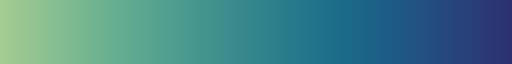

In [129]:
sns.color_palette("crest", as_cmap=True)

*Так как основной цвет Ассоциации СИГРЭ - зеленый, подобрана подходящая палитра для представления графика (просто для красоты)*

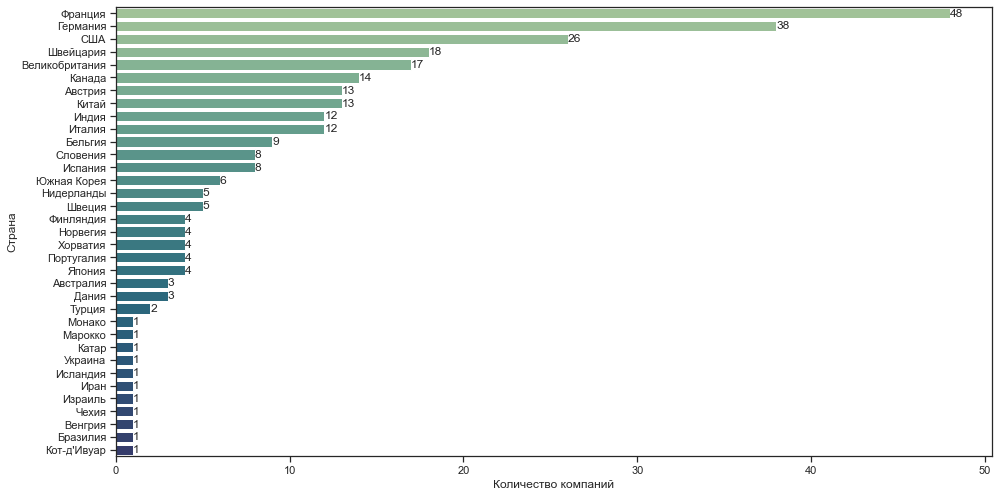

In [143]:
fig = sns.barplot(x='Количество компаний', y='Страна', data=plot, palette='crest')
fig.bar_label(fig.containers[0])
plt.show()

In [146]:
fig.get_figure().savefig('plot1.png')

In [131]:
filter_countries = ['Китай', 'Индия', 'Турция', 'Марокко', 'Катар', 'Иран', 'Бразилия', "Кот-д'Ивуар"]

Дружественные страны определялись вручную (исходя из ситуации)

In [137]:
df[df['Партнер'] == 'Да']

,№,Название компании,Страна,Номер стенда,Сайт,Партнер
37,38,CIGRE NGN,Франция,Exhibition floor,http://session.cigre.org/ngn-showcase,Да
62,63,Électricité de France (EDF),Франция,S163,http://www.edf.fr/,Да
130,131,Korea Electric Power Corporation (KEPCO),Южная Корея,S244,http://home.kepco.co.kr/kepco/main.do,Да
142,143,LS Electric,Южная Корея,S154,http://www.ls-electric.com/,Да
162,163,Monenco Iran,Иран,S178A,http://www.monencogroup.com/,Да
213,214,Prysmian Group,Италия,S237,http://www.prysmiangroup.com/,Да
249,250,"SHANGHAI HUAMING POWER EQUIPMENT CO., LTD.",Китай,S326,http://www.huaming.com/,Да
267,268,Streamer Electric AG,Швейцария,S104,http://www.streamer-electric.com/,Да
290,291,"Zhejiang Chint Electrics CO, LTD",Китай,S138,http://www.chint.com/,Да


Из таблицы видно, что компании-партнеры могут быть не из дружественных стран. Поэтому мы фильтруем итоговый датафрейм с двумя условиями "дружественная страна" + "компания-партнер"

In [138]:
df_result = df[(df['Страна'].isin(filter_countries) | (df['Партнер'] == 'Да'))].fillna('').reset_index(drop = True)

In [139]:
df_result['№'] = np.arange(1, len(df2) + 1)

In [142]:
df_result.head(10)

,№,Название компании,Страна,Номер стенда,Сайт,Партнер
0,1,APUA,Кот-д'Ивуар,S207,http://www.apua-asea.org/,
1,2,ASHIDA ELECTRONICS PVT LTD,Индия,S127A,http://www.ashidaelectronics.com/,
2,3,CCIPT Machinery Sub Council,Китай,Exhibition floor,http://www.chinamachine.org.cn/,
3,4,CEEIA,Китай,Exhibition floor,http://www.ceeia.com/,
4,5,CIGRE GCC Symposium 2022 Oman (Mascate),Катар,S185,http://www.cigre-gcc.org/,
5,6,CIGRE NGN,Франция,Exhibition floor,http://session.cigre.org/ngn-showcase,Да
6,7,CMS,Марокко,S123A,http://www.cmscompany.net/,
7,8,CTR Manufacturing Industries Pvt. Ltd.,Индия,S106,http://www.ctr.in/,
8,9,Électricité de France (EDF),Франция,S163,http://www.edf.fr/,Да
9,10,Electric Power Research Institute of China Sou...,Китай,S316B,http://eng.csg.cn/home/,


In [149]:
df_result.shape

(38, 6)

In [141]:
df_result.to_excel("output.xlsx")  

В результате сформирован список 38 компаний, стенды которых потенциально можно посетить. Результаты выгружены для принятия дальнейшего решения визиту/организации встречи с конкретной компанией